In [1]:
print('Loading modules...')
import pickle
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import sklearn
import argparse
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Loading modules...


In [2]:

regressor = 'rf'
input_dim = 25 #maybe more later

precip_mean = np.load('./data/precip_mean.npy')
precip_std = np.load('./data/precip_std.npy')
temp_mean = np.load('./data/temp_mean.npy')
temp_std = np.load('./data/temp_std.npy')
land_cells = np.load('./data/land_cells.npy')
v_coord = np.load('./data/v_coord.npy')
h_coord = np.load('./data/h_coord.npy')
p_m_past_month = np.load('./data/p_mean_past_month.npy')
p_s_past_month = np.load('./data/p_std_past_month.npy')
t_m_past_month = np.load('./data/t_mean_past_month.npy')
t_s_past_month = np.load('./data/t_std_past_month.npy')
years = np.load('./data/years.npy')
ltc = np.load('./data/ltc.npy')

fire_counts = np.load('./data/fire_counts.npy') #assuming dim n_pointsx1
n_points = len(fire_counts)

X = np.zeros((n_points, input_dim))
y = fire_counts




In [3]:
for i in range(n_points):
    X[i,0] = precip_mean[i]
    X[i,1] = precip_std[i]
    X[i,2] = temp_mean[i]
    X[i,3] = temp_std[i]
    X[i,4] = land_cells[i]
    kl = 0
    for j in range(16):

        X[i,5+j]=ltc[j,i]

    X[i,21] = p_m_past_month[i]
    X[i,22] = p_s_past_month[i]
    X[i,23] = t_m_past_month[i]
    X[i,24] = t_s_past_month[i]


print(n_points)



60348


In [5]:


if regressor == 'rf':
    regr = RandomForestRegressor()
elif regressor == 'lr':
    regr = LinearRegression()
elif regressor == 'gbt':
    regr = GradientBoostingRegressor()

print('Training Regressor...')

regr.fit(X,y)

#save regressor

#save regressor features
#if regressor == 'rf':
 #   np.save('./data/models/regressor_feats/feat_imp_'+regressor,regr.feature_importances_)

importances = regr.feature_importances_

Training Regressor...


In [7]:
importances

array([0.2789159 , 0.04672077, 0.05163252, 0.04263811, 0.00842945,
       0.05312827, 0.04796502, 0.00079517, 0.00656571, 0.02567891,
       0.01010109, 0.01122075, 0.01022232, 0.11646681, 0.03640645,
       0.00967527, 0.02381017, 0.02225498, 0.02195386, 0.00071241,
       0.03829798, 0.04799376, 0.01498961, 0.03223221, 0.04119251])

In [34]:
feature_names = ['precip mean','precip std','temp mean','temp std','land cover','pr/tmp month before']

In [35]:
feature_imps=np.zeros((6,))
feature_imps[0]=importances[0]
feature_imps[1]=importances[1]
feature_imps[2]=importances[2]
feature_imps[3]=importances[3]
feature_imps[4]=np.sum(importances[4:21])
feature_imps[5]=np.sum(importances[21:])

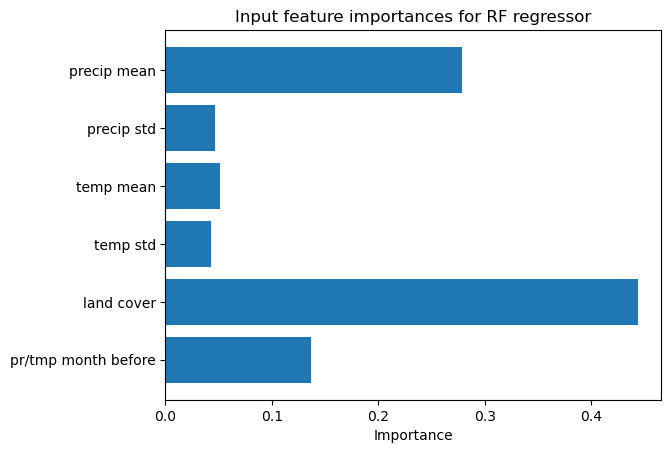

In [36]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(6)
performance = 3 + 10 * np.random.rand(len(people))
error = np.zeros((6,))

ax.barh(y_pos, feature_imps, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(feature_names)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Importance')
ax.set_title('Input feature importances for RF regressor')
#plt.gcf().subplots_adjust(left=0.5)
plt.show()
fig.savefig('feature_importances',bbox_inches='tight')